In [19]:
import numpy as np
import pandas as pd

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

#from root
%store -r df

In [20]:
df.shape

(7822066, 22)

In [21]:
#make a new datafram by coping <df2_dammy>
model_timeSeries = df.copy()
model_timeSeries.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.6700,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.7654,"(41.895080471, -87.765400451)"


In [22]:
#changes 'Date' to a date type
model_timeSeries['Date'] = pd.to_datetime(model_timeSeries['Date'])
model_timeSeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7822066 entries, 0 to 7822065
Data columns (total 22 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int64         
 18  Updated On            object        
 19  

In [23]:
#set the column as index
model_timeSeries.set_index('Date', inplace=True)
model_timeSeries.head(1)

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-05 13:30:00,10224738,HY411648,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.67,"(41.815117282, -87.669999562)"


In [24]:
model_timeSeries.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7822066 entries, 2015-09-05 13:30:00 to 2022-09-26 19:20:00
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Block                 object 
 3   IUCR                  object 
 4   Primary Type          object 
 5   Description           object 
 6   Location Description  object 
 7   Arrest                bool   
 8   Domestic              bool   
 9   Beat                  int64  
 10  District              float64
 11  Ward                  float64
 12  Community Area        float64
 13  FBI Code              object 
 14  X Coordinate          float64
 15  Y Coordinate          float64
 16  Year                  int64  
 17  Updated On            object 
 18  Latitude              float64
 19  Longitude             float64
 20  Location              object 
dtypes: bool(2), float64(7), int64(3), object(9)


from here https://www.kaggle.com/code/mcarujo/time-series-chicago-crimes-prophetfb

In [25]:
#the number of crimes per Year and Months
aux = pd.DataFrame(model_timeSeries.resample("M").size(), columns=["Number of cases"])
aux["Month"] = aux.index.month.astype(str)
aux["Year"] = aux.index.year.astype(str)
aux["Year-Month"] = aux["Year"].str.cat(aux["Month"].str.zfill(2), sep="-")
aux.head()

,Number of cases,Month,Year,Year-Month
Date,,,,
2001-01-31,38120,1,2001,2001-01
2001-02-28,33786,2,2001,2001-02
2001-03-31,40566,3,2001,2001-03
2001-04-30,40091,4,2001,2001-04
2001-05-31,41839,5,2001,2001-05


C:\Users\robso\AppData\Local\Temp\ipykernel_11964\837468102.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  aux_csm = aux_csm.pivot("Month", "Year", "Number of cases").fillna(0).astype(int)


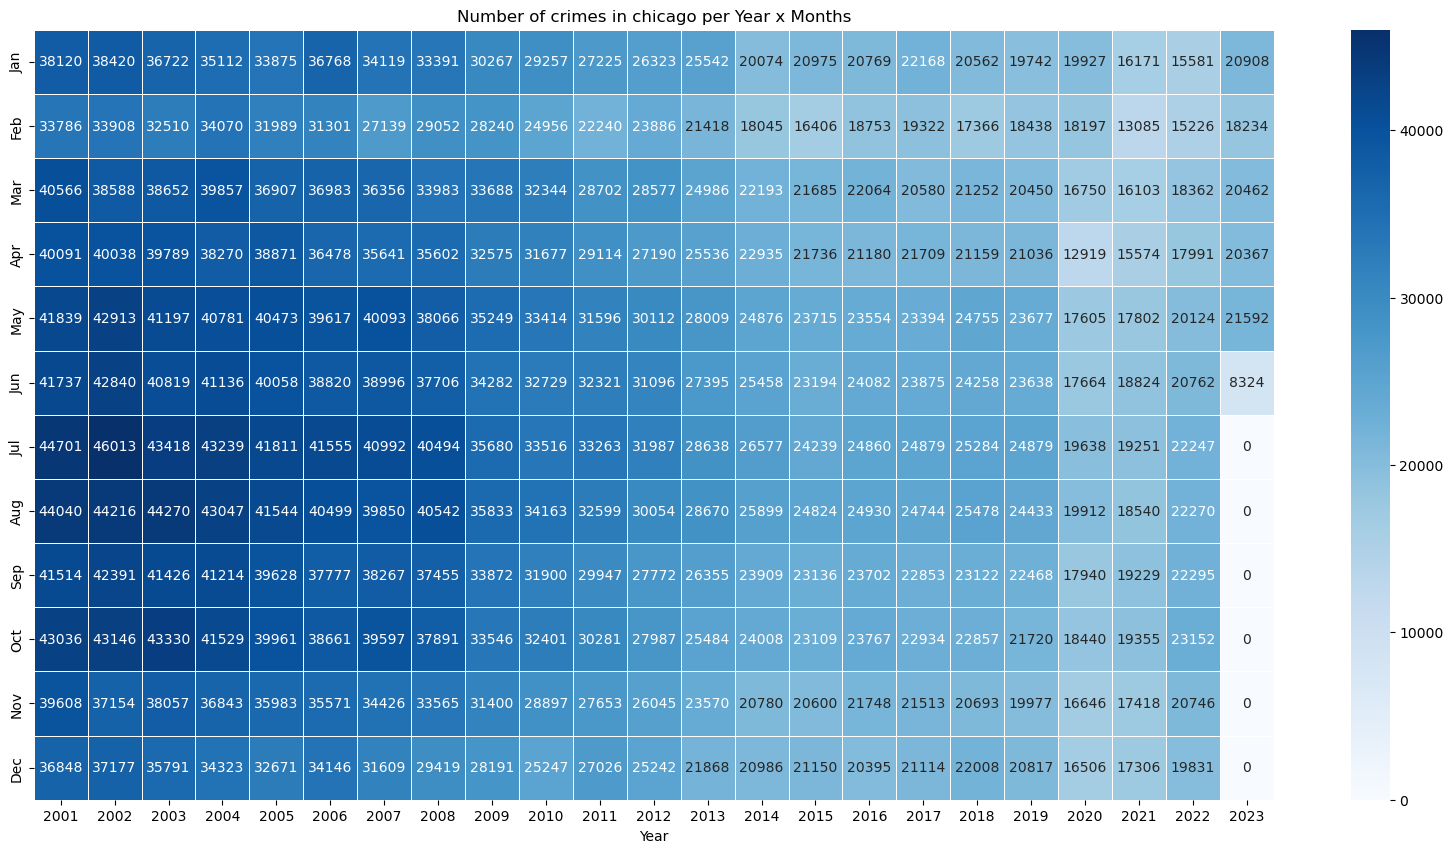

In [26]:
#heatmap
aux_csm = aux[["Month", "Year", "Number of cases"]]
aux_csm = aux_csm.pivot("Month", "Year", "Number of cases").fillna(0).astype(int)
aux_csm.index = aux_csm.index.astype(int)
aux_csm = aux_csm.sort_index()
aux_csm.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(20, 10))
_ = sns.heatmap(
    aux_csm,
    annot=True,
    fmt="d",
    linewidths=0.5,
    cmap="Blues",
).set_title('Number of crimes in chicago per Year x Months')

- getting lighter colors towards recent year.
- Feb. is lighter color over yaer every year. summer time in chicago looks darker colors.
- during pandemic (march april , 2020 to 2022), lighter color becuse probably less ppl go out.
- getting normal: end of 2022 to 2023, getting darker colors

In [27]:
#bar
fig = px.bar(
    aux,
    x="Year-Month",
    y="Number of cases",
    hover_data=["Year", "Month", "Number of cases"],
    color="Number of cases",
    height=600,
    width=1400,
    color_continuous_scale=px.colors.sequential.Blugrn

)
fig.update_layout(title_text='Crime counts per year-month in bars')
fig.show()

- bar graph confirms # getting lower
- 2015-2020: kind of flat
- 2020- less then increase in the end

In [28]:
#aggregate by month
agg_months = aux.groupby(['Month'])['Number of cases'].sum().reset_index()
agg_months.Month = agg_months.Month.astype(int)
agg_months.sort_values('Month',inplace=True)
agg_months.Month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = px.bar(
    agg_months,
    x="Month",
    y="Number of cases",
    color="Number of cases",
    text="Number of cases",
    height=600,
    width=1400,
    color_continuous_scale=px.colors.sequential.Blugrn
)
fig.update_traces(texttemplate="%{text:.2s}", textposition="outside")
fig.update_layout(title_text="Crime counts per year-month in stacked bars (Month)")
fig.show()

- Jul and Aug: about 700K
- Feb: 550K

In [29]:
#aggregate by year
fig = px.bar(
    aux.groupby(['Year'])['Number of cases'].sum().reset_index(),
    x="Year",
    y="Number of cases",
    color="Number of cases",
    text="Number of cases",
    height=600,
    width=1400,
        color_continuous_scale=px.colors.sequential.Blugrn

)
fig.update_traces(texttemplate="%{text:.2s}", textposition="outside")
fig.update_layout(title_text="Crime counts per year-month in stacked bars (Years)")

fig.show()

In [30]:
data_model = pd.DataFrame(model_timeSeries.resample("M").size().reset_index())
data_model.columns = ["ds", "y"]
print(data_model.shape)
data_model.head()

(270, 2)


,ds,y
0,2001-01-31,38120
1,2001-02-28,33786
2,2001-03-31,40566
3,2001-04-30,40091
4,2001-05-31,41839


In [31]:
fig = px.line(data_model, x="ds", y="y")
fig.update_layout(
    title="Chicago crimes from 2001 to 2023 (counted per Month).",
    xaxis_title="Date",
    yaxis_title="Crimes",
    font=dict(
        size=14,
    )
)

untill here https://www.kaggle.com/code/mcarujo/time-series-chicago-crimes-prophetfb